In [8]:
BiocManager::install(update = TRUE)


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.1 (2024-06-14)

Old packages: 'BiocManager', 'DOSE', 'GOSemSim', 'RcppArmadillo', 'RcppEigen',
  'boot', 'clusterProfiler', 'cpp11', 'curl', 'data.table', 'digest',
  'enrichplot', 'evaluate', 'ggfun', 'ggrepel', 'nlme', 'openssl', 'patchwork',
  'pbdZMQ', 'ps', 'rmarkdown', 'scatterpie', 'tinytex', 'xfun', 'yulab.utils'



In [11]:
BiocManager::install("org.Mm.eg.db",force=TRUE)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.1 (2024-06-14)

Installing package(s) 'org.Mm.eg.db'

installing the source package 'org.Mm.eg.db'


Old packages: 'BiocManager', 'DOSE', 'GOSemSim', 'RcppArmadillo', 'RcppEigen',
  'boot', 'cpp11', 'curl', 'data.table', 'digest', 'enrichplot', 'evaluate',
  'ggfun', 'ggrepel', 'nlme', 'openssl', 'patchwork', 'pbdZMQ', 'ps',
  'rmarkdown', 'scatterpie', 'tinytex', 'xfun', 'yulab.utils'



In [15]:
library(clusterProfiler)
library(org.Mm.eg.db)



clusterProfiler v4.12.6 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

Guangchuang Yu, Li-Gen Wang, Yanyan Han and Qing-Yu He.
clusterProfiler: an R package for comparing biological themes among
gene clusters. OMICS: A Journal of Integrative Biology 2012,
16(5):284-287


Attaching package: 'clusterProfiler'


The following object is masked from 'package:stats':

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, ra

In [17]:
nr1d1 <- readLines("nr1d1_uniq_ID.txt")
hdac3 <- readLines("hdac3_uniq_ID.txt")
nfil3 <- readLines("nfil3_uniq_ID.txt")

In [18]:
perform_gsea <- function(gene_set) {
    enrichGO(
        gene         = gene_set,
        OrgDb        = org.Mm.eg.db,
        keyType      = "SYMBOL",  # Assumes your genes are in SYMBOL format
        ont          = "BP",      # Biological Process
        pAdjustMethod = "BH",     # Benjamini-Hochberg correction
        pvalueCutoff = 0.05,
        qvalueCutoff = 0.05
    )
}

# Perform GSEA for each gene set
gsea_hdac3 <- perform_gsea(hdac3)
gsea_nfil3 <- perform_gsea(nfil3)
gsea_nr1d1 <- perform_gsea(nr1d1)

In [21]:
head(gsea_nfil3)

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0060252,GO:0060252,positive regulation of glial cell proliferation,5/315,30/28905,0.16666667,15.293651,8.221858,1.696687e-05,0.04092811,0.03276044,Lyn/Mecp2/Prkci/Ptk2/Tnf,5
GO:0046486,GO:0046486,glycerolipid metabolic process,15/315,388/28905,0.03865979,3.547496,5.302793,2.694424e-05,0.04092811,0.03276044,Cds2/Chka/Dgat1/Dgke/Impa2/Mecp2/Mgll/Mtmr9/Mttp/Pik3r5/Pip5k1b/Pla2g2d/Pla2g7/Plb1/Sacm1l,15
GO:0060251,GO:0060251,regulation of glial cell proliferation,6/315,56/28905,0.10714286,9.831633,6.943794,3.279496e-05,0.04092811,0.03276044,Hes1/Lyn/Mecp2/Prkci/Ptk2/Tnf,6
GO:0006644,GO:0006644,phospholipid metabolic process,14/315,368/28905,0.03804348,3.490942,5.047898,5.918459e-05,0.04530675,0.03626527,Cds2/Chka/Dgke/Enpp7/Impa2/Mecp2/Mtmr9/Pik3r5/Pip5k1b/Pla2g2d/Pla2g7/Plb1/Sacm1l/Vapa,14
GO:0006650,GO:0006650,glycerophospholipid metabolic process,12/315,279/28905,0.04301075,3.946749,5.191490,6.263062e-05,0.04530675,0.03626527,Cds2/Chka/Dgke/Impa2/Mecp2/Mtmr9/Pik3r5/Pip5k1b/Pla2g2d/Pla2g7/Plb1/Sacm1l,12
GO:0014015,GO:0014015,positive regulation of gliogenesis,7/315,93/28905,0.07526882,6.906810,5.988733,7.260697e-05,0.04530675,0.03626527,Hes1/Lyn/Mecp2/Prkci/Ptk2/Tlr2/Tnf,7


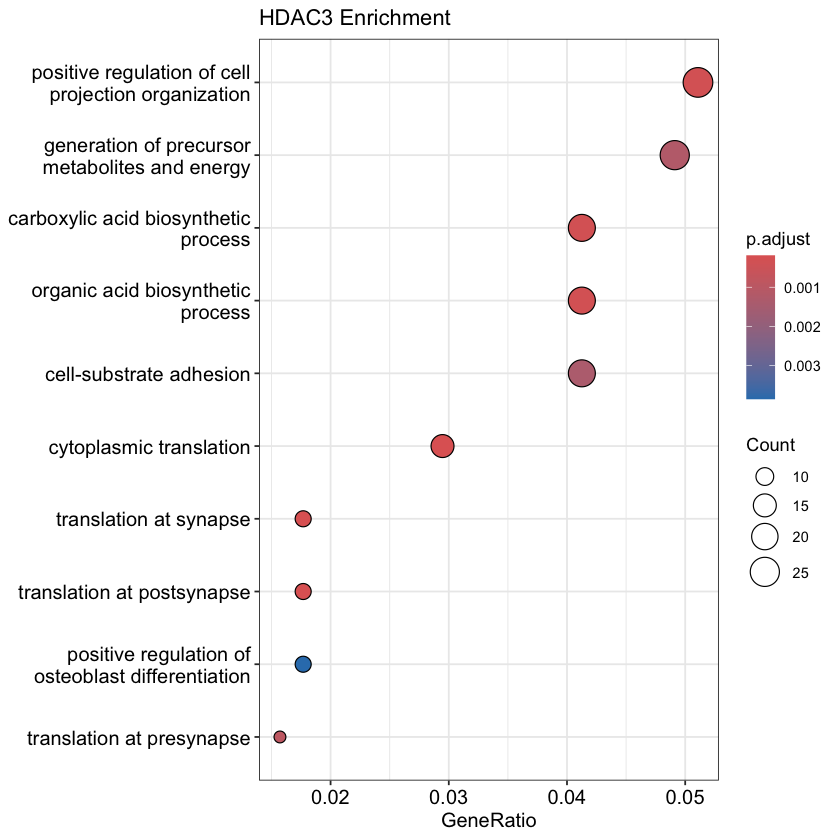

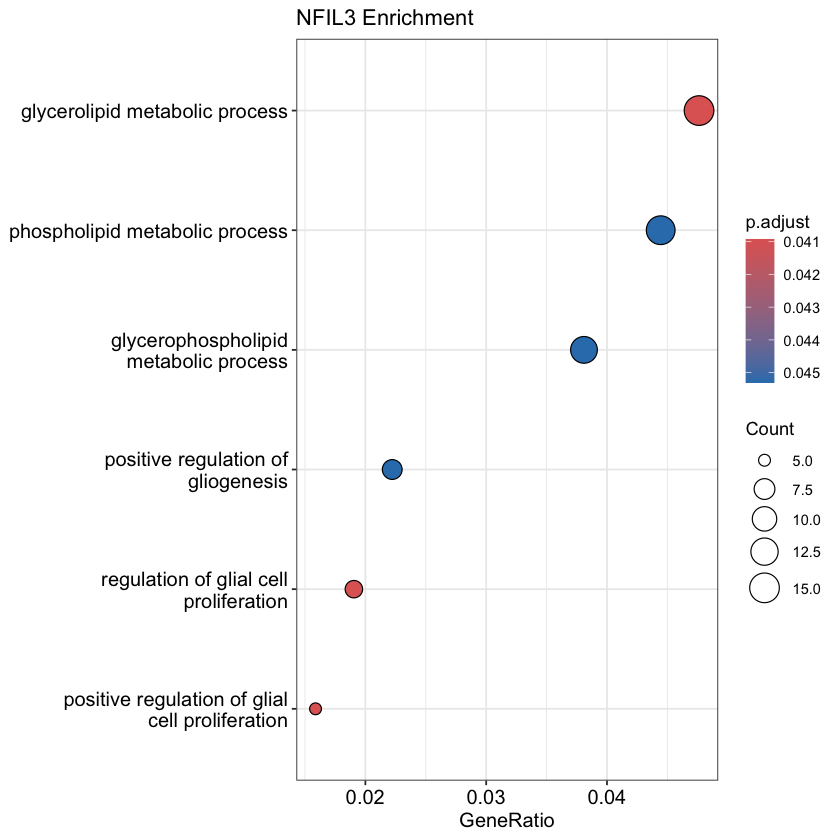

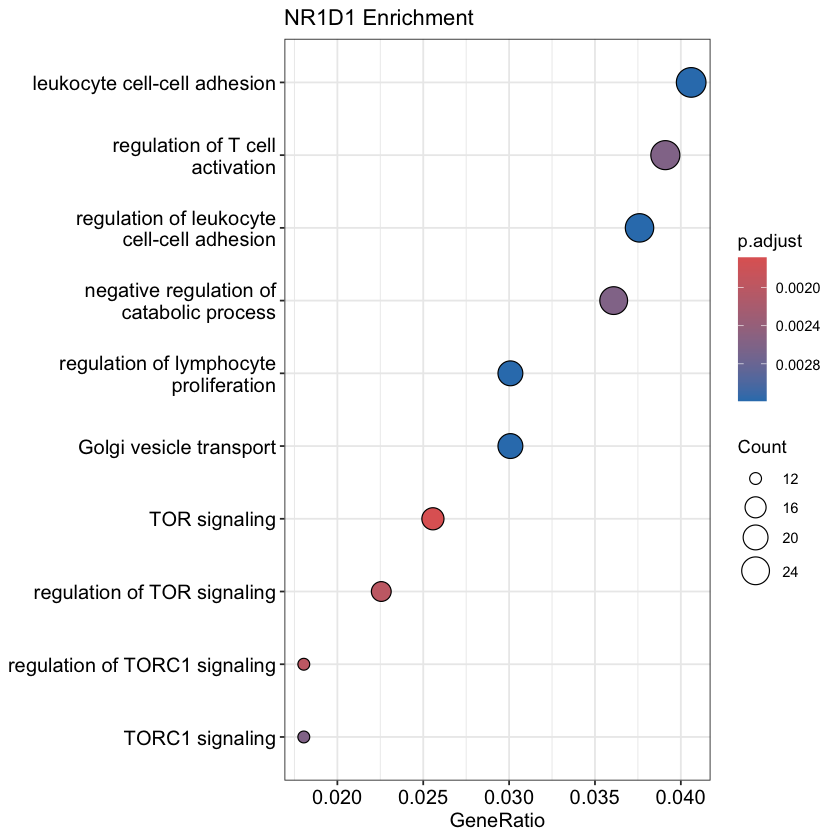

In [22]:
# Load ggplot2 for plotting
library(ggplot2)

# Dot plot function
dot_plot_gsea <- function(gsea_results, title) {
    dotplot(gsea_results, showCategory = 10) + ggtitle(title)
}

# Generate dot plots for each gene set
dot_plot_hdac3 <- dot_plot_gsea(gsea_hdac3, "HDAC3 Enrichment")
dot_plot_nfil3 <- dot_plot_gsea(gsea_nfil3, "NFIL3 Enrichment")
dot_plot_nr1d1 <- dot_plot_gsea(gsea_nr1d1, "NR1D1 Enrichment")

# Display the plots
print(dot_plot_hdac3)
print(dot_plot_nfil3)
print(dot_plot_nr1d1)